Name :- Ashish

Email Id :- eraerashish56@gmail.com 

Contact No. :- 9999024806

## **Task 2 :- To Explore Supervised Machine Learning.**

**In regression task predict the percentage of marks that a student is expected to score based upon the number of hours they studied.**

Dataset :- http://bit.ly/w-data

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


Data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(Data.head())

#Explore the shape of the data. 
print("\n")
print('Shape of the Data:', Data.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Shape of the Data: (25, 2)


The Dataset Contained 25 Rows and 2 Columns.

In [3]:
# To get quick overview of the dataset we use info() function. In pandas info() function is used to get concise summary of the dataframe.

print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


There are two columns :- Hours (datatype = float64) and Scores (datatype =Int64)

In [4]:
# Now Check is there any Null value in our dataset. 

Data.isnull().any()

Hours     False
Scores    False
dtype: bool

There are no Null Value in our Dataset.

In [5]:
# Now Check the basic statistical details of a data frame. In pandas describe() function is used to get a summary of statistics pertaining to the DataFrame columns.

Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here We Check the percentile, mean, std, min, max values of the dataframe.

**Scatter plot with Plotly Express**

    Plotting the distribution of scores.

In [6]:
fig = px.scatter(Data,x='Hours',y='Scores',
                 labels={
                     "Hours": "Student Study Hours",
                     "Scores": "Score Percentage",
                 })

fig.update_layout(
    title={
        'text': "Hours vs Percentage",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    font=dict(
        size=18
    )
)

fig.update_layout(
    title_font_family="Times New Roman",
    font_color="Green",
    title_font_color="red")

fig.update_xaxes(title_font_family="Arial")
fig.update_yaxes(title_font_family="Arial")
fig.show()

    After Scatter we see there is a linear relationship between the number of hours studied and percentage of score. 

Now Preparing the data for LinearRegression.

In [7]:
# Divide the dataset into X as "Input" and Y as "Output"

X = Data.iloc[ :, : -1].values   #Input
Y = Data.iloc[ :, 1].values    #Output

# Split the dataset into train and test

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2, random_state = 3)

print('Shape of the X_train :', X_train.shape)
print('Shape of the X_test :', X_test.shape)

print("\n")
print('Shape of the Y_train :', Y_train.shape)
print('Shape of the Y_test :', Y_test.shape)

print("\n")
print("Here, We split the data 80% into training set and 20% into testing set.")

Shape of the X_train : (20, 1)
Shape of the X_test : (5, 1)


Shape of the Y_train : (20,)
Shape of the Y_test : (5,)


Here, We split the data 80% into training set and 20% into testing set.


**Modal Building**

In [8]:
# Fitting LinearRegression 

Modal = LinearRegression()
Modal.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Predicting the Test set Result
y_prediction = Modal.predict(X_test)

# Accuracy Score
score=r2_score(Y_test,y_prediction)
print('\n''LinearRegression modal score :',(score))


LinearRegression modal score : 0.945261762833401


In [10]:
#Comparing Predicted value and Actual Value
dataframe  = pd.DataFrame({'Actual_Value' : Y_test, 'Predicted_Value' : y_prediction})
dataframe


,Actual_Value,Predicted_Value
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


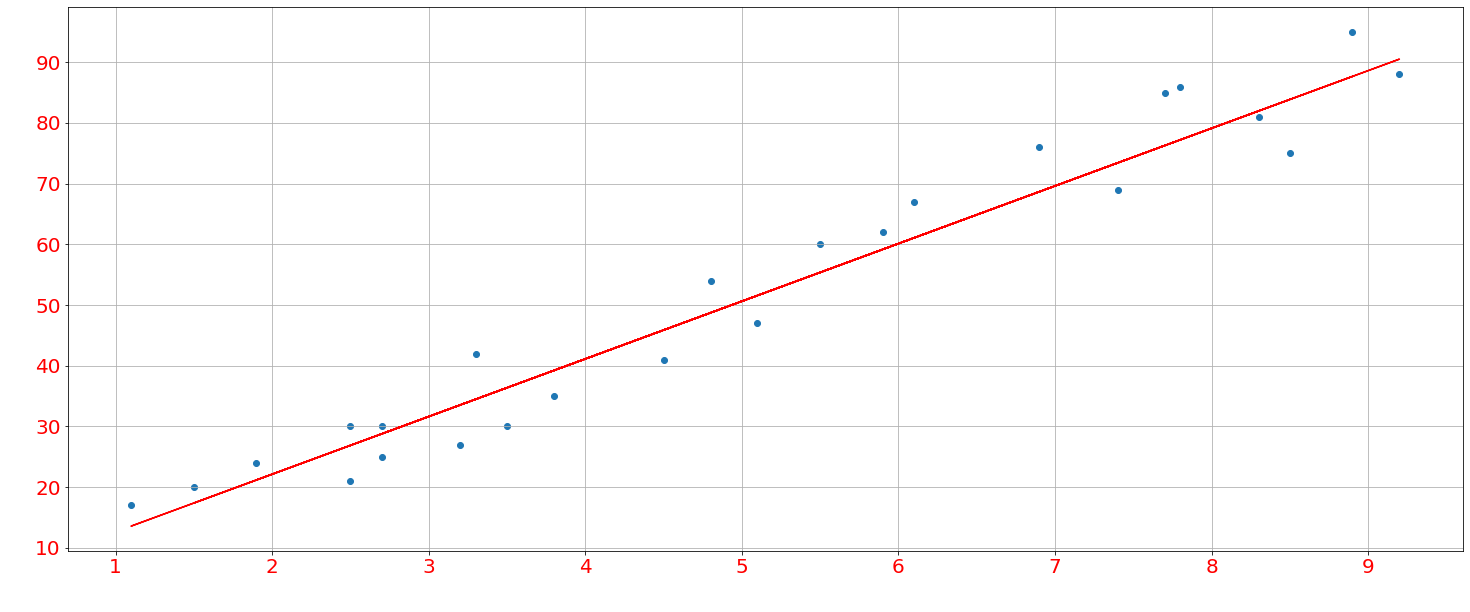

In [11]:
Coefficients = Modal.coef_
Intercept = Modal.intercept_
Line = Coefficients*X+Intercept

plt.figure(figsize= (25,10))
plt.scatter(X,Y)
plt.plot(X,Line,color='red')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.xlabel('Hours',color='white',size = 25)
plt.ylabel('Precentage Scores',color='white',size = 25)
plt.grid()
plt.show()

**Predicting Score for Hours studied**

In [12]:
Hours_Studied = ([9.25],)
Predicited_Score = Modal.predict(Hours_Studied)
print('Number of Hour:', Hours_Studied)
print('Predicited Score:', Predicited_Score)

Number of Hour: ([9.25],)
Predicited Score: [90.990855]


**Evaluate the performance of Modal**

In [13]:
print('Coefficients_Value:',Coefficients)
print('\n''Intercept_Value:',Intercept)
print('\n''Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_prediction))  
print('\n''Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(Y_test, y_prediction)))
print('\n''Mean Squared Error:', metrics.mean_squared_error(Y_test, y_prediction))  
print('\n''Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_prediction)))

Coefficients_Value: [9.49792159]

Intercept_Value: 3.135080283641699

Mean Absolute Error: 5.656974488548368

Root Mean Absolute Error: 2.3784395070189124

Mean Squared Error: 34.87044660461019

Root Mean Squared Error: 5.905120371729113


**Conclusion** :- 
From above result we say that if student study 9.25 hours then student gets 90.99 Marks.

**Accurcy Score of linearRegression Modal 94.52%**

Here we can see that the value of Root Mean Squared Error is 5.905, Which is less than 10% of the Mean value of the scores of all the students i.e 51.48.This means that our Modal did a great work. 

## **Task 3 :- To Explore Unsupervised Machine Learning**

**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

Dataset :- https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing



Step 1 :- Importing the libraries and Dataset.

In [15]:
import pandas as pd 
import numpy as np
from sklearn.cluster import k_means
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
iris  = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In this Dataset, we have a various Sepal and Petal lengths and Widths. These all are already classified into a Species. 

    Data Exploration and Cleaning 
Our Dataset is extremely clean, we try to refine our dataset.




In [19]:
print('\n''Shape of Iris Dataset:',iris.shape)  # Shape of the Dataset. 


Shape of Iris Dataset: (150, 6)


In [20]:
print('\n''Name of columns:-''\n',iris.columns)  #Check The of the Dataset Cloumns. 


Name of columns:-
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In Iris Dataframe the id column is gratuitous. So we will drop it. 

In [21]:
iris.drop('Id',axis = 1, inplace = True)

To get quick overview of the dataset we use info() function. In pandas info() function is used to get concise summary of the dataframe.


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now Check the basic statistical details of a data frame. In pandas describe() function is used to get a summary of statistics pertaining to the DataFrame columns.


In [23]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# Now Check is there any Null value in our dataset. 

iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [25]:
#Now Check the Species of the flowers 

print(iris['Species'].unique())

print('\n''Quantity of the Species :-''\n''\n',iris['Species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Quantity of the Species :-

 Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


    Data Visualizing of Iris Dataset using Different Chats.

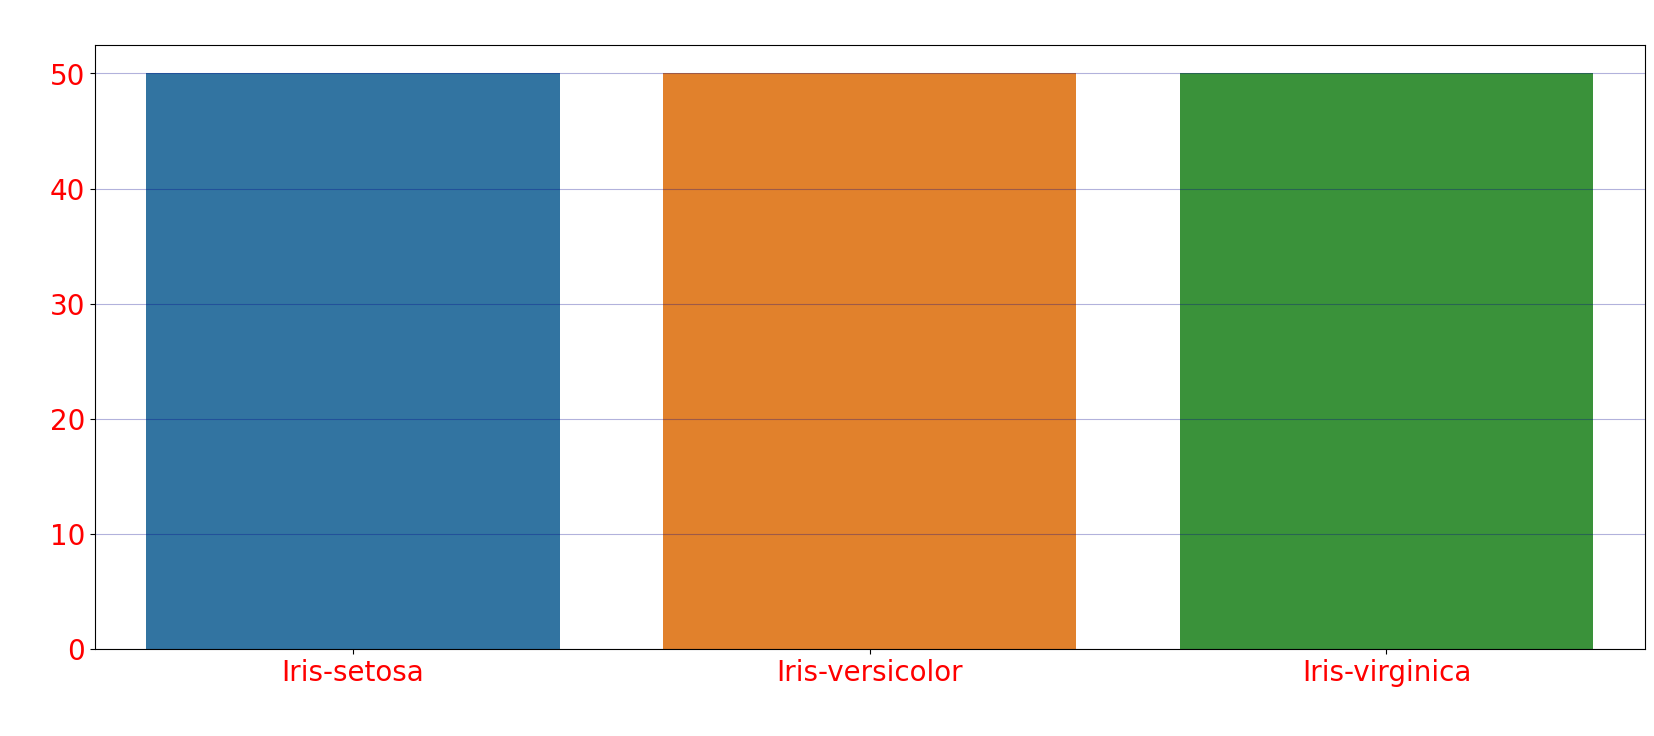

In [26]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sea.countplot('Species',data = iris)
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Count of Species',color='white',size = 25)
plt.xlabel('Species',color='white',size = 25)
plt.ylabel('Count',color='white',size = 25)

plt.show()

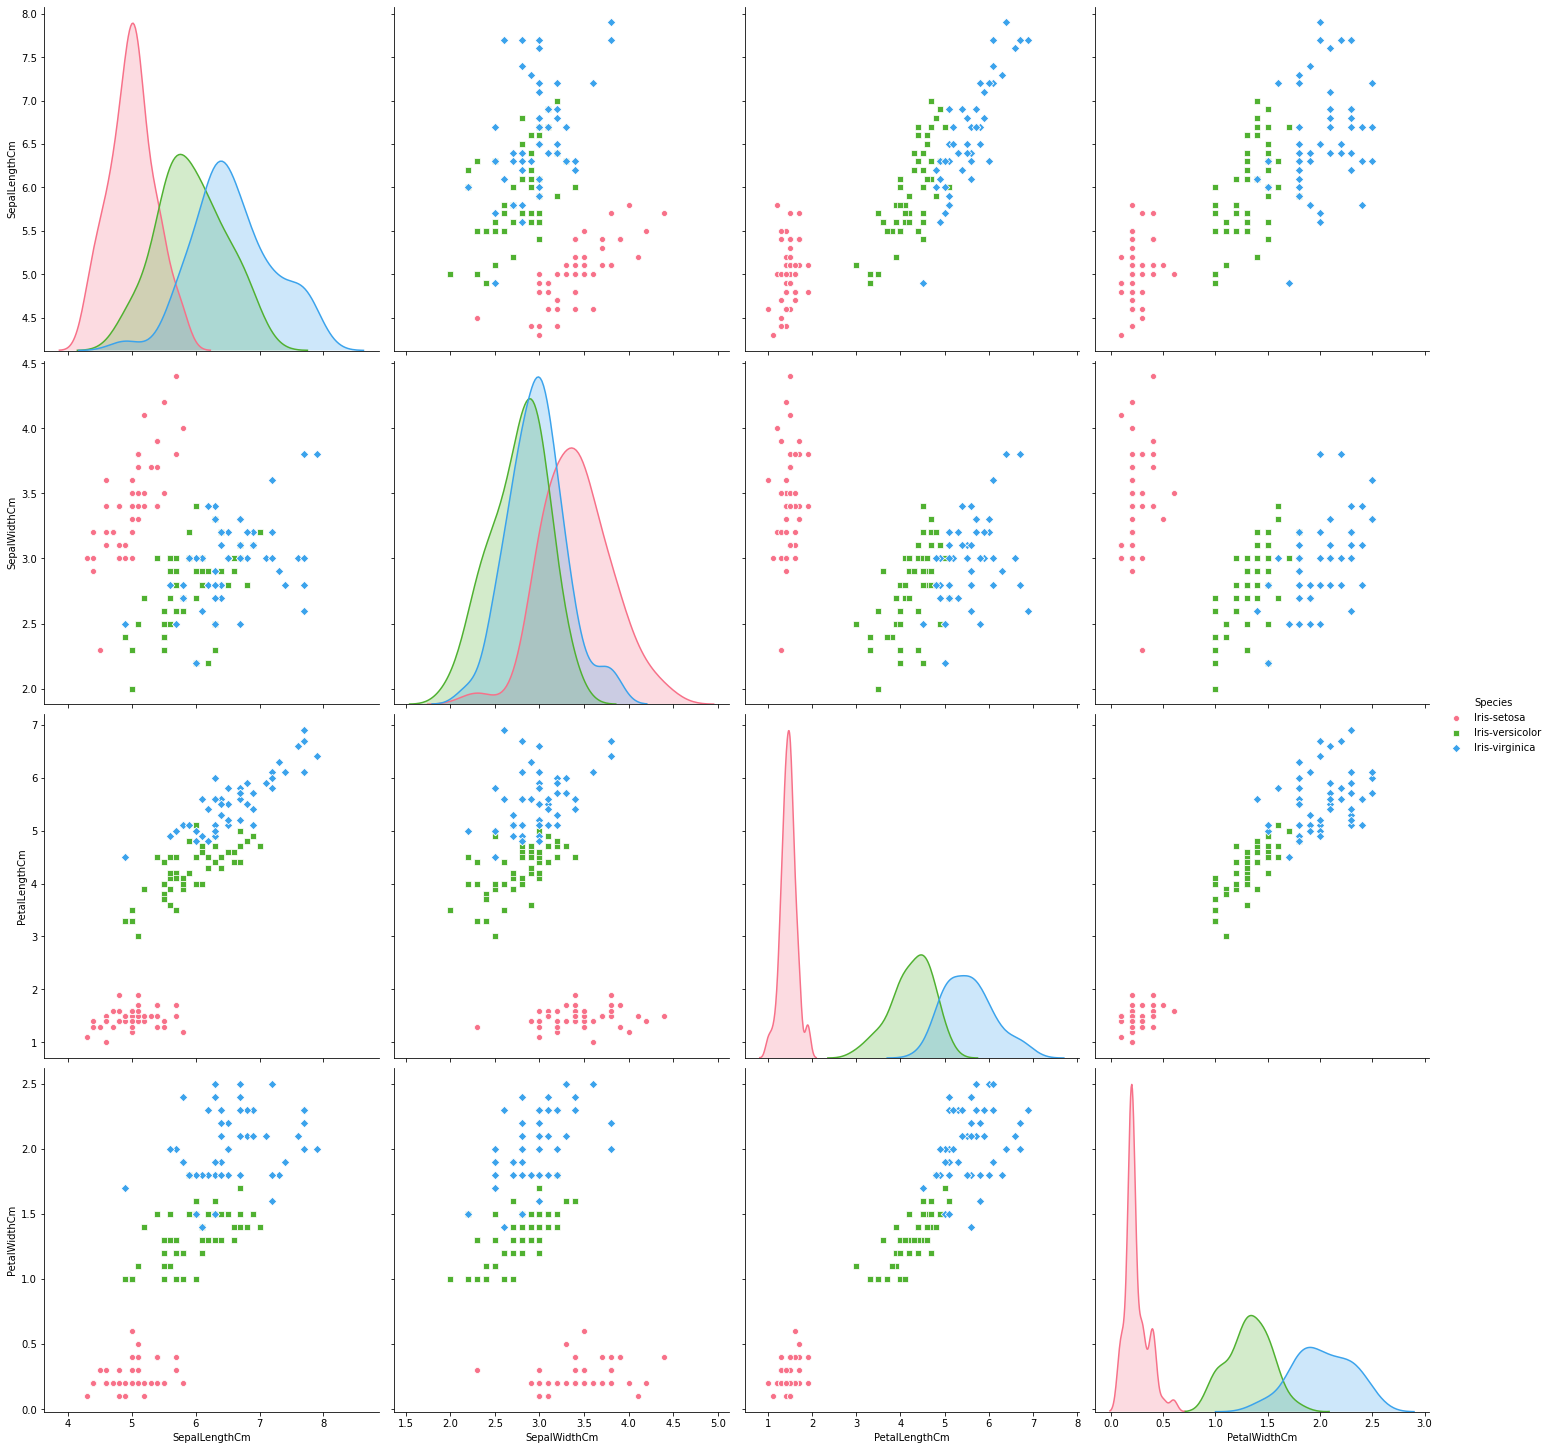

In [27]:

sea.pairplot(data = iris, hue = 'Species',palette="husl",markers=["o", "s", "D"],height=5)


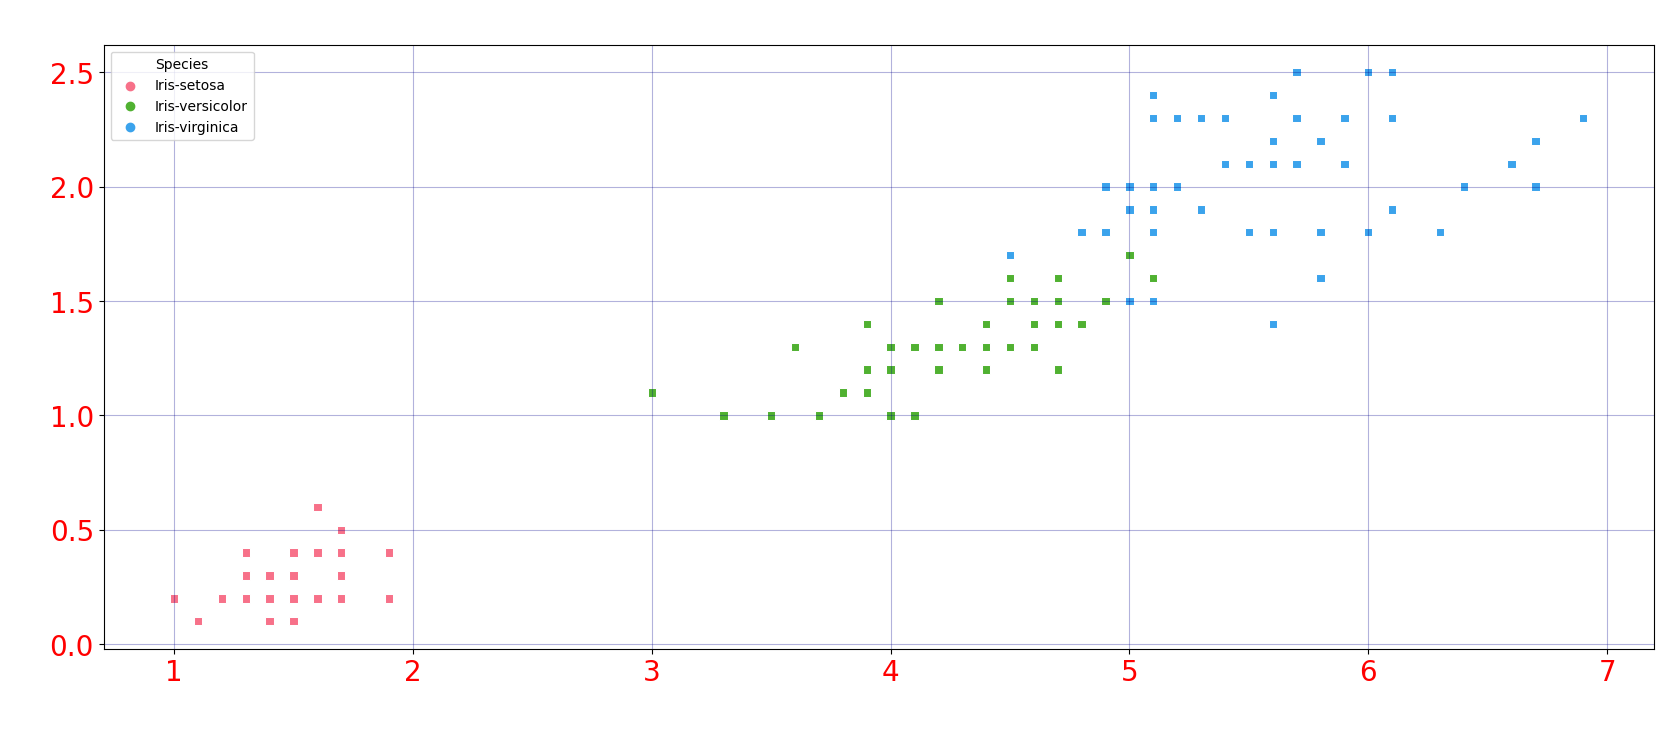

In [28]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sea.scatterplot(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Length and Width of Petals Distribution of each Species',color='white',size = 25)
plt.xlabel('PetalLengthCm',color='white',size = 25)
plt.ylabel('PetalWidthCm',color='white',size = 25)

plt.show()

 
**If Petal Length is less than 2 and Width is less than 0.7 then Species is 'Setosa'.**

**If Petal Length is between 3 to 5.3 and Width is between 1.0 to 1.7 then Species is 'Versicolor'.**

**If Petal Length is greater than 5.2 and Width is greater than 1.7 then Species is 'Virginica'.**

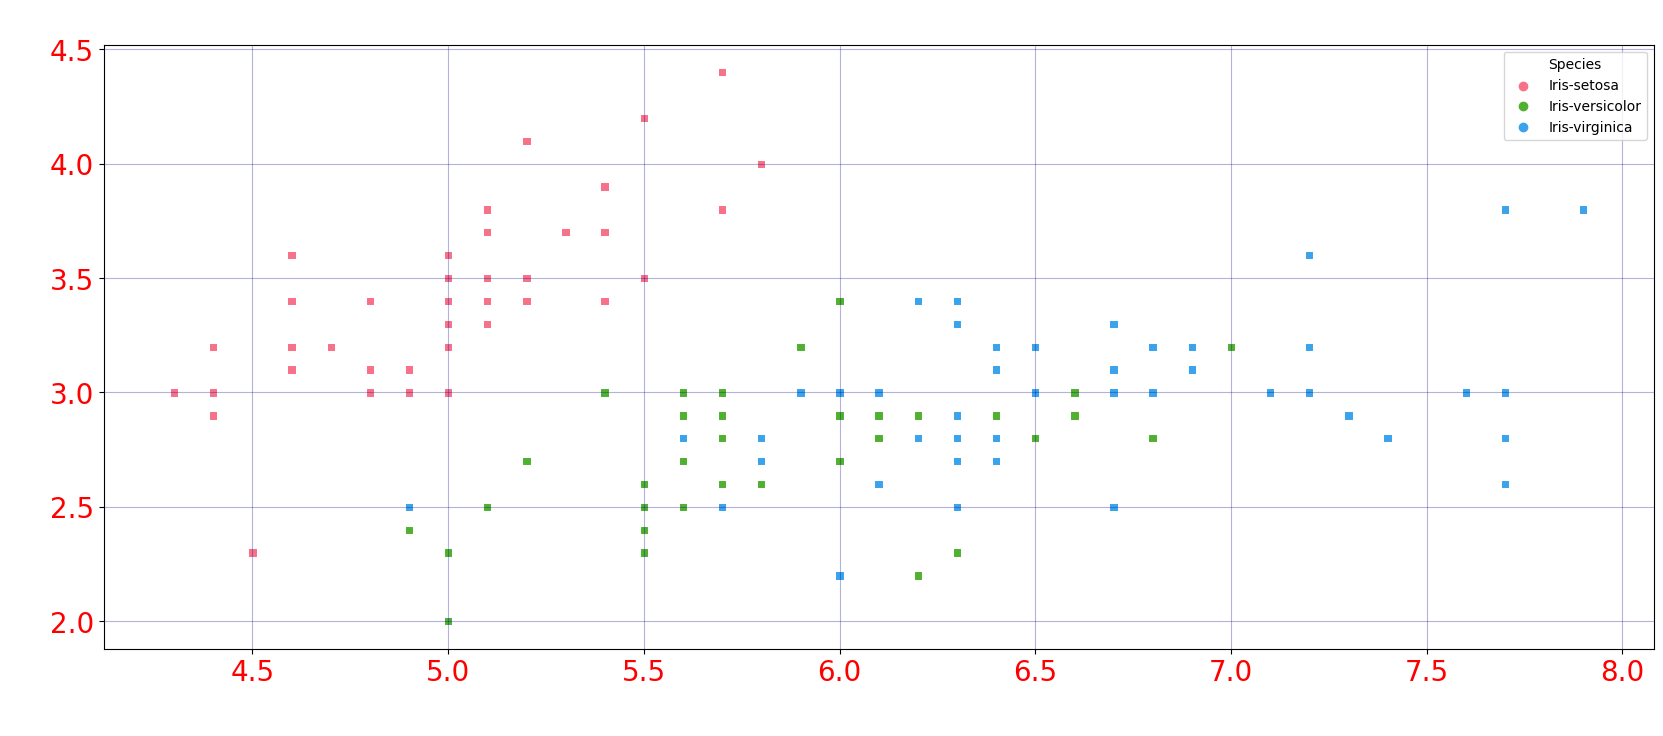

In [29]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

sea.scatterplot(x = iris['SepalLengthCm'], y = iris['SepalWidthCm'], hue = iris['Species'],palette="husl",marker='s')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Length and Width of Sepals',color='white',size = 25)
plt.xlabel('SepalLengthCm',color='white',size = 25)
plt.ylabel('SepalWidthCm',color='white',size = 25)

plt.show()

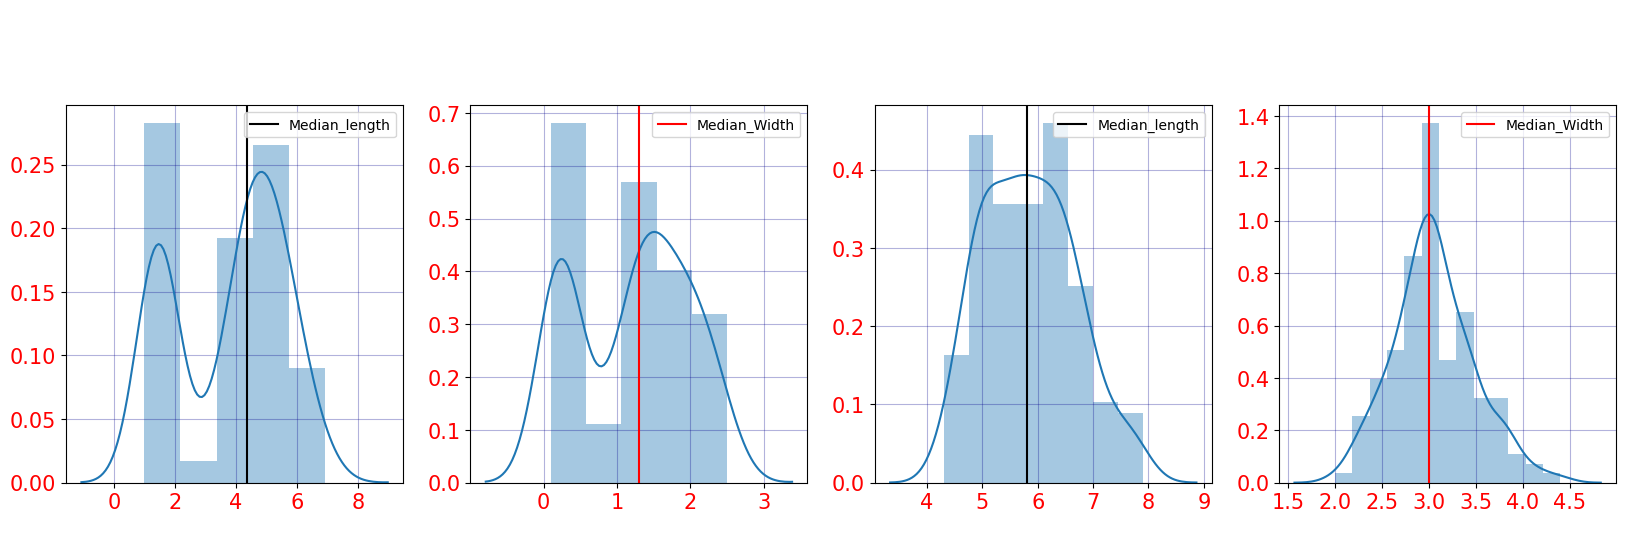

In [67]:
Fig = plt.figure(figsize = (20,5), dpi = 100)
Axis1 = plt.subplot(1, 4, 1)

g = sea.distplot(iris['PetalLengthCm'], ax=Axis1)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis1.set_xlabel('Petal_Length(Cm)' ,color='white',size = 15)
Axis1.set_title('Petal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['PetalLengthCm'].median()),color='white',size = 15)
g.axvline(iris['PetalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis1.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis2 = plt.subplot(1, 4, 2)
g = sea.distplot(iris['PetalWidthCm'], ax=Axis2)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis2.set_xlabel('Petal_Width(Cm)' ,color='white',size = 15)
Axis2.set_title('Petal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['PetalWidthCm'].median()),color='white',size = 15)
g.axvline(iris['PetalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis2.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis3 = plt.subplot(1, 4, 3)
g = sea.distplot(iris['SepalLengthCm'], ax=Axis3)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis3.set_xlabel('Sepal_Length(Cm)' ,color='white',size = 15)
Axis3.set_title('Sepal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['SepalLengthCm'].median()),color='white',size = 15)
g.axvline(iris['SepalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis3.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)


Axis4 = plt.subplot(1, 4, 4)
g = sea.distplot(iris['SepalWidthCm'], ax=Axis4)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis4.set_xlabel('Sepal_Width(Cm)' ,color='white',size = 15)
Axis4.set_title('Sepal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['SepalWidthCm'].median()),color='white',size = 15)
g.axvline(iris['SepalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis4.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.show()

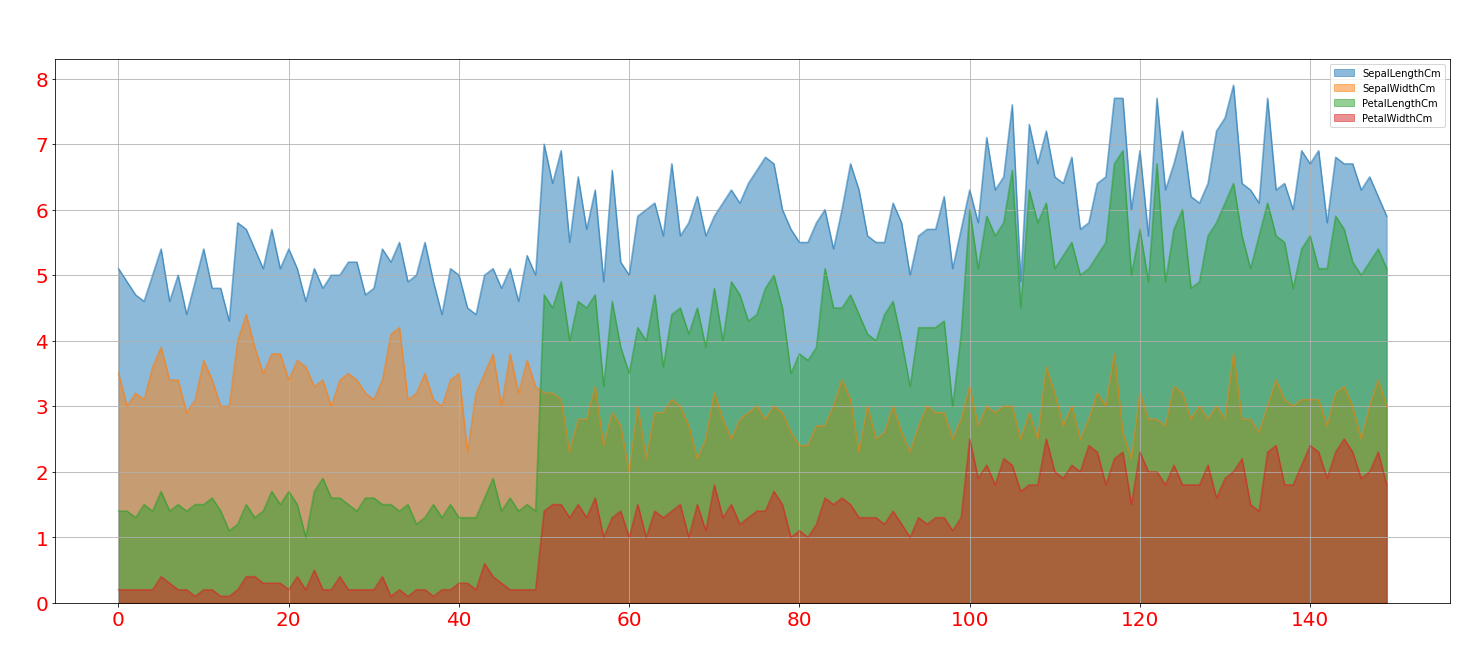

In [32]:

iris.plot.area(y=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],figsize= (25,10),stacked = False )

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Area Plot of Various dimensions' '\n',color='white',size = 25)
plt.xlabel('Number of flower',color='white',size = 25)
plt.ylabel('Dimensions(Cm)',color='white',size = 25)
plt.grid()
plt.show()

    **Unsupervised Machine Learning Modal**

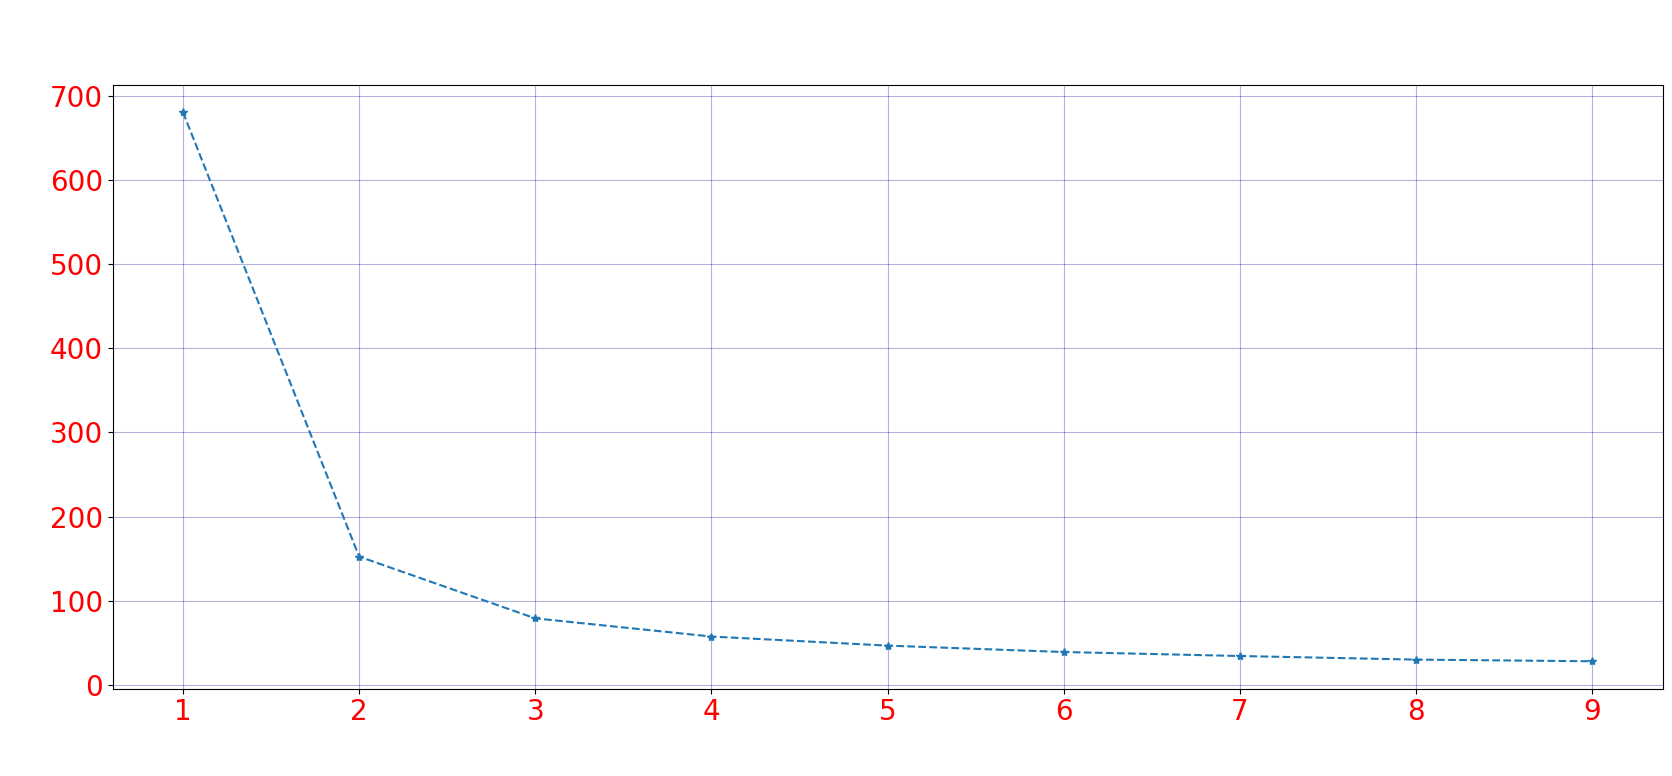

In [33]:
#Finding the optimum number of cluster for K-Means Cluster
x = iris.iloc[:, 0:4].values

from sklearn.cluster import KMeans
WCSS = []

for  i in range(1,10):
  Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  Kmeans.fit(x)
  WCSS.append(Kmeans.inertia_)


plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.plot(range(1,10),WCSS,'*--')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('The Elbow Method' '\n',color='white',size = 25)
plt.xlabel('Number of Cluster',color='white',size = 25)
plt.ylabel('WCSS',color='white',size = 25)


plt.show()

The Elbow method is used to determine the optimal number of clusters in k-means clustering. The Elbow method plots the values of the cost function produced by different values of K.

From Elbow method, we see that the second bend on the diagram is at K=3. 

In [34]:
Kmeans = KMeans(n_clusters = 3, init = 'k-means++' , max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = Kmeans.fit_predict(x)
iris['Prediction'] = y_kmeans

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


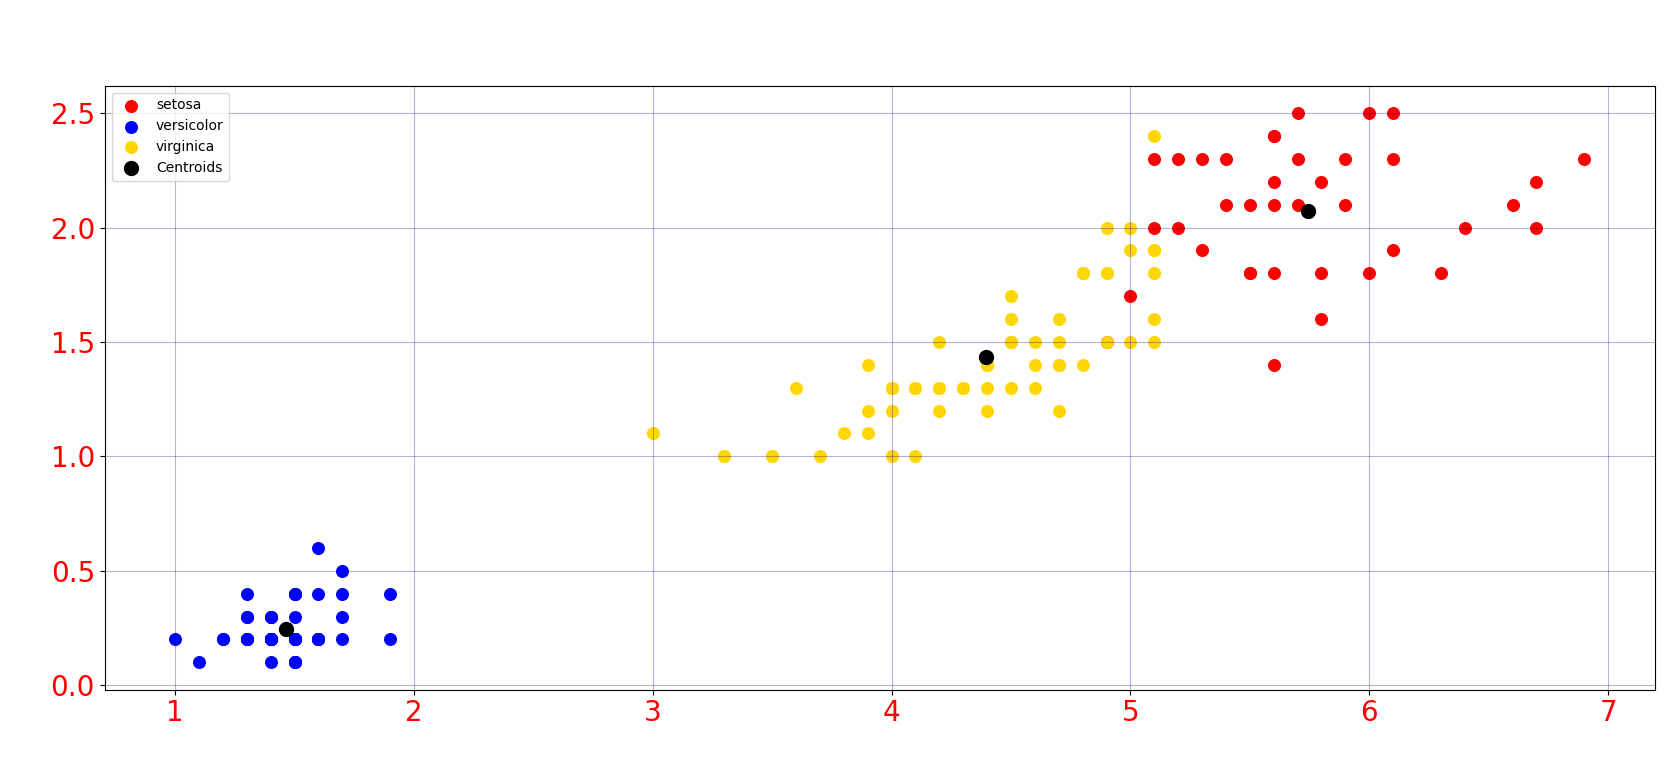

In [35]:


plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s= 70, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s= 70, c = 'blue', label = 'versicolor')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s= 70, c = 'gold', label = 'virginica')

plt.scatter(Kmeans.cluster_centers_[:, 2], Kmeans.cluster_centers_[:, 3], s = 100, c = 'black', label = 'Centroids')

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Clustering_based_on_Petal' '\n', color='white',size = 25)
plt.xlabel('Petal_Length', color='white', size = 25)
plt.ylabel('Petal_Width', color='white', size = 25)
plt.legend()
plt.show()

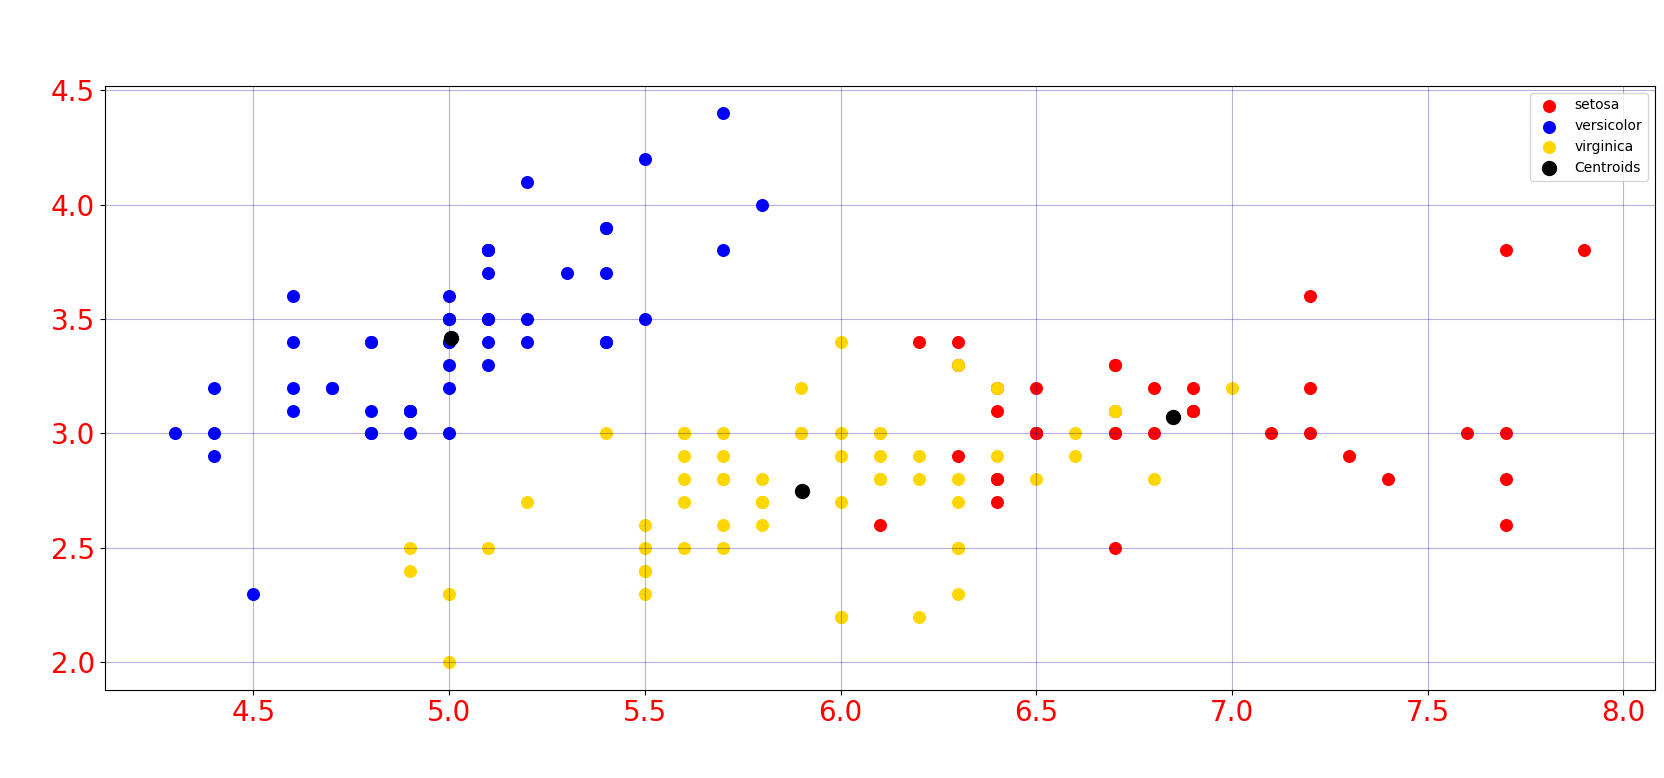

In [36]:
plt.figure(figsize = (20,8), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s= 70, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 70, c = 'blue', label = 'versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s= 70, c = 'gold', label = 'virginica')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Clustering_based_on_Sepal' '\n', color='white',size = 25)
plt.xlabel('Sepal_Length', color='white', size = 25)
plt.ylabel('Sepal_Width', color='white', size = 25)
plt.legend()
plt.show()

In [43]:
confusion_matrix(iris['Prediction'],y_kmeans)

array([[38,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 62]])

**Conclusion**

**As we can see using K-Means clustering, we could label most of the clusters correctly. Some of the points couldnot be classified correctly. However,majority of the points could be segmented accurately. Hence, Unsupervised learning such as K-Means cluster can be really benefical when we don't have the 
labels.**

# **Task 4 :- To Explore Decision Tree Algorithm**

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

Importing the libraries and Dataset.

In [45]:
import pandas as  pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

In [49]:
iris  = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
print('\n''Shape of Iris Dataset:',iris.shape)  # Shape of the Dataset.
print('\n''Name of columns:-''\n',iris.columns)  #Check The of the Dataset Cloumns. 


Shape of Iris Dataset: (150, 6)

Name of columns:-
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [51]:
iris.drop('Id',axis = 1, inplace = True)

In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [55]:
print(iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [56]:
print('\n''Quantity of the Species :-''\n''\n',iris['Species'].value_counts())


Quantity of the Species :-

 Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


In [58]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Data Visualization 

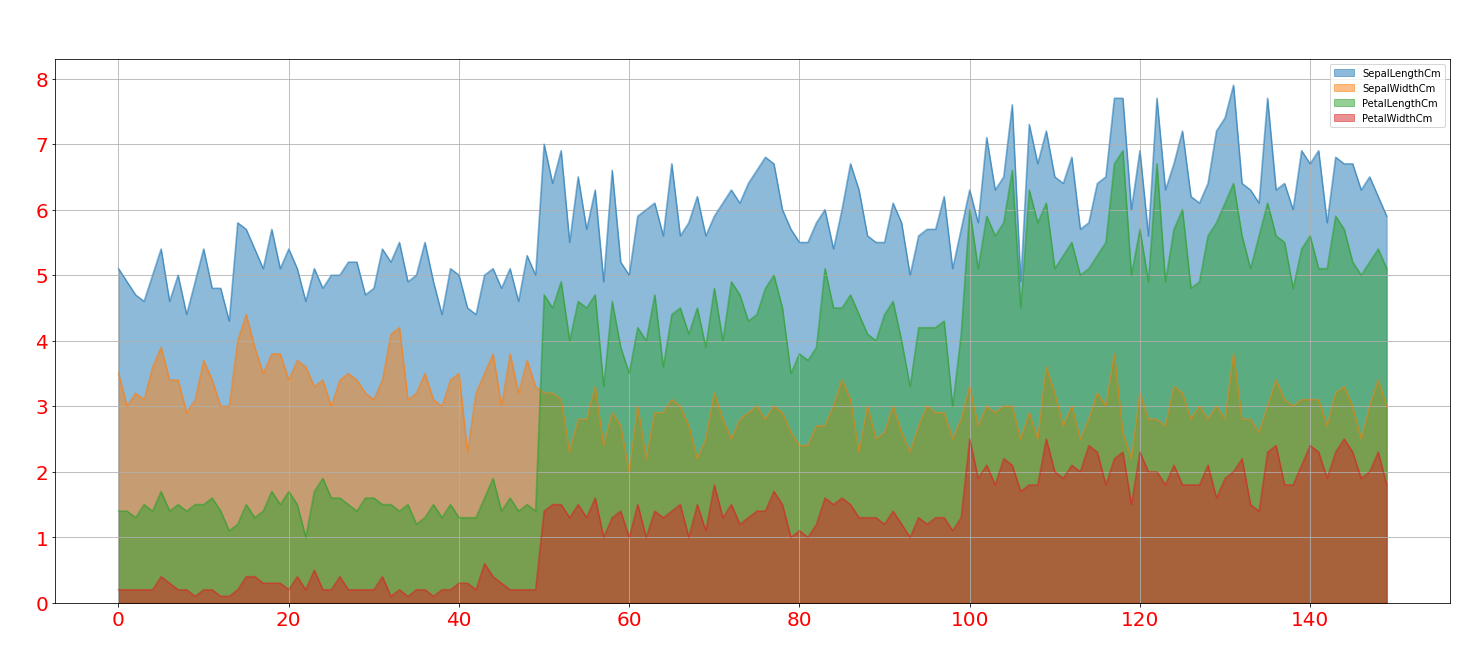

In [59]:
iris.plot.area(y=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],figsize= (25,10),stacked = False )

plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.title('Area Plot of Various dimensions' '\n',color='white',size = 25)
plt.xlabel('Number of flower',color='white',size = 25)
plt.ylabel('Dimensions(Cm)',color='white',size = 25)
plt.grid()
plt.show()

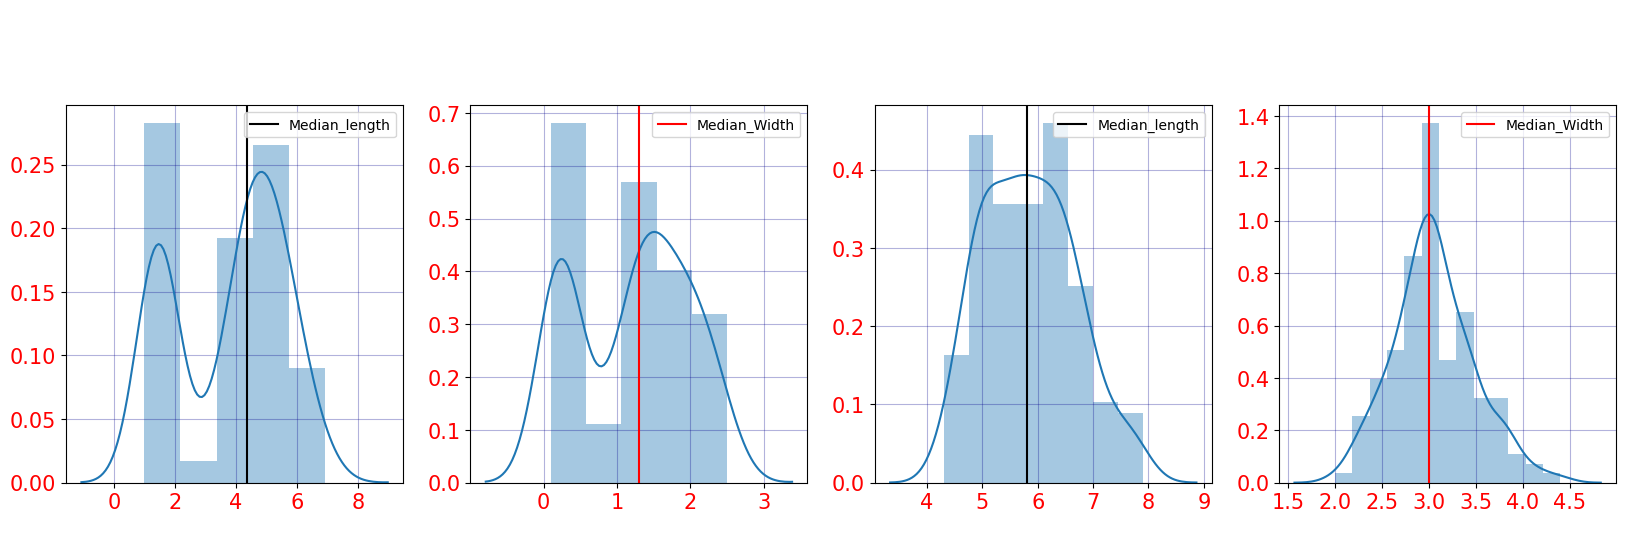

In [66]:
Fig = plt.figure(figsize = (20,5), dpi = 100)
Axis1 = plt.subplot(1, 4, 1)

g = sea.distplot(iris['PetalLengthCm'], ax=Axis1)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis1.set_xlabel('Petal_Length(Cm)' ,color='white',size = 15)
Axis1.set_title('Petal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['PetalLengthCm'].median()),color='white',size = 15)
g.axvline(iris['PetalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis1.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis2 = plt.subplot(1, 4, 2)
g = sea.distplot(iris['PetalWidthCm'], ax=Axis2)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis2.set_xlabel('Petal_Width(Cm)' ,color='white',size = 15)
Axis2.set_title('Petal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['PetalWidthCm'].median()),color='white',size = 15)
g.axvline(iris['PetalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis2.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')

Axis3 = plt.subplot(1, 4, 3)
g = sea.distplot(iris['SepalLengthCm'], ax=Axis3)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis3.set_xlabel('Sepal_Length(Cm)' ,color='white',size = 15)
Axis3.set_title('Sepal_Length_Disturbution' '\n' '\n' 'Median_Length_(Cm)  : {0:.2f}' '\n' .format(iris['SepalLengthCm'].median()),color='white',size = 15)
g.axvline(iris['SepalLengthCm'].median(),color = 'black',label = 'Median_length')
Axis3.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)


Axis4 = plt.subplot(1, 4, 4)
g = sea.distplot(iris['SepalWidthCm'], ax=Axis4)
plt.grid(color = 'darkBlue', alpha = 0.3)
Axis4.set_xlabel('Sepal_Width(Cm)' ,color='white',size = 15)
Axis4.set_title('Sepal_Width_Disturbution' '\n' '\n' 'Median_Width_(Cm)  : {0:.2f}' '\n' .format(iris['SepalWidthCm'].median()),color='white',size = 15)
g.axvline(iris['SepalWidthCm'].median(),color = 'red',label = 'Median_Width')
Axis4.legend()
plt.yticks(fontsize=15,color = 'red')
plt.xticks(fontsize=15,color = 'red')
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.show()

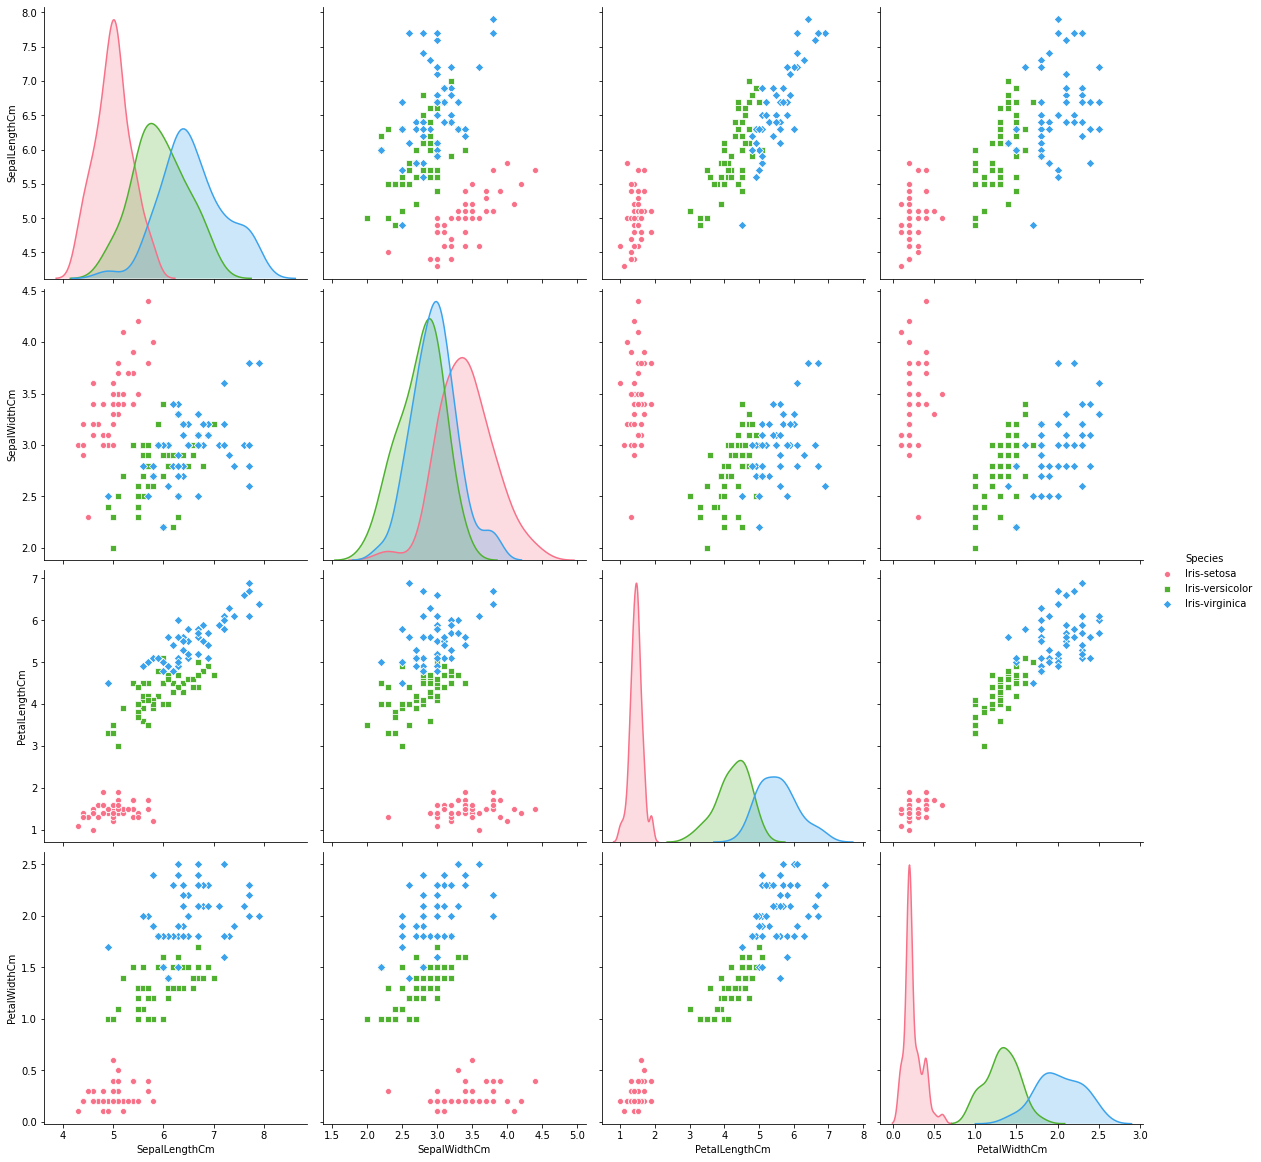

In [71]:
sea.pairplot(data = iris, hue = 'Species',palette="husl",markers=["o", "s", "D"],height=4)
plt.show()

In [109]:
iris_data=iris.drop('Species',axis = 1).to_numpy()
iris_species= iris['Species'].to_numpy()
y_target = LabelEncoder().fit_transform(iris_species)
y_target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [116]:
X_train, X_test, Y_train, Y_test  = train_test_split(iris_data, y_target, test_size = 0.2, random_state = 3)
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:
Prediction = Decision_Tree_Classifier.predict(X_test)
Prediction

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 2, 1])

In [121]:
from sklearn.metrics import accuracy_score
print('The accuracy of the Decision_Tree_Classifier is',accuracy_score(Y_test, Prediction)*100)

The accuracy of the Decision_Tree_Classifier is 96.66666666666667


In [119]:
print('\n''Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Prediction))  
print('\n''Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(Y_test, Prediction)))
print('\n''Mean Squared Error:', metrics.mean_squared_error(Y_test, Prediction))  
print('\n''Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Prediction)))


Mean Absolute Error: 0.03333333333333333

Root Mean Absolute Error: 0.18257418583505536

Mean Squared Error: 0.03333333333333333

Root Mean Squared Error: 0.18257418583505536


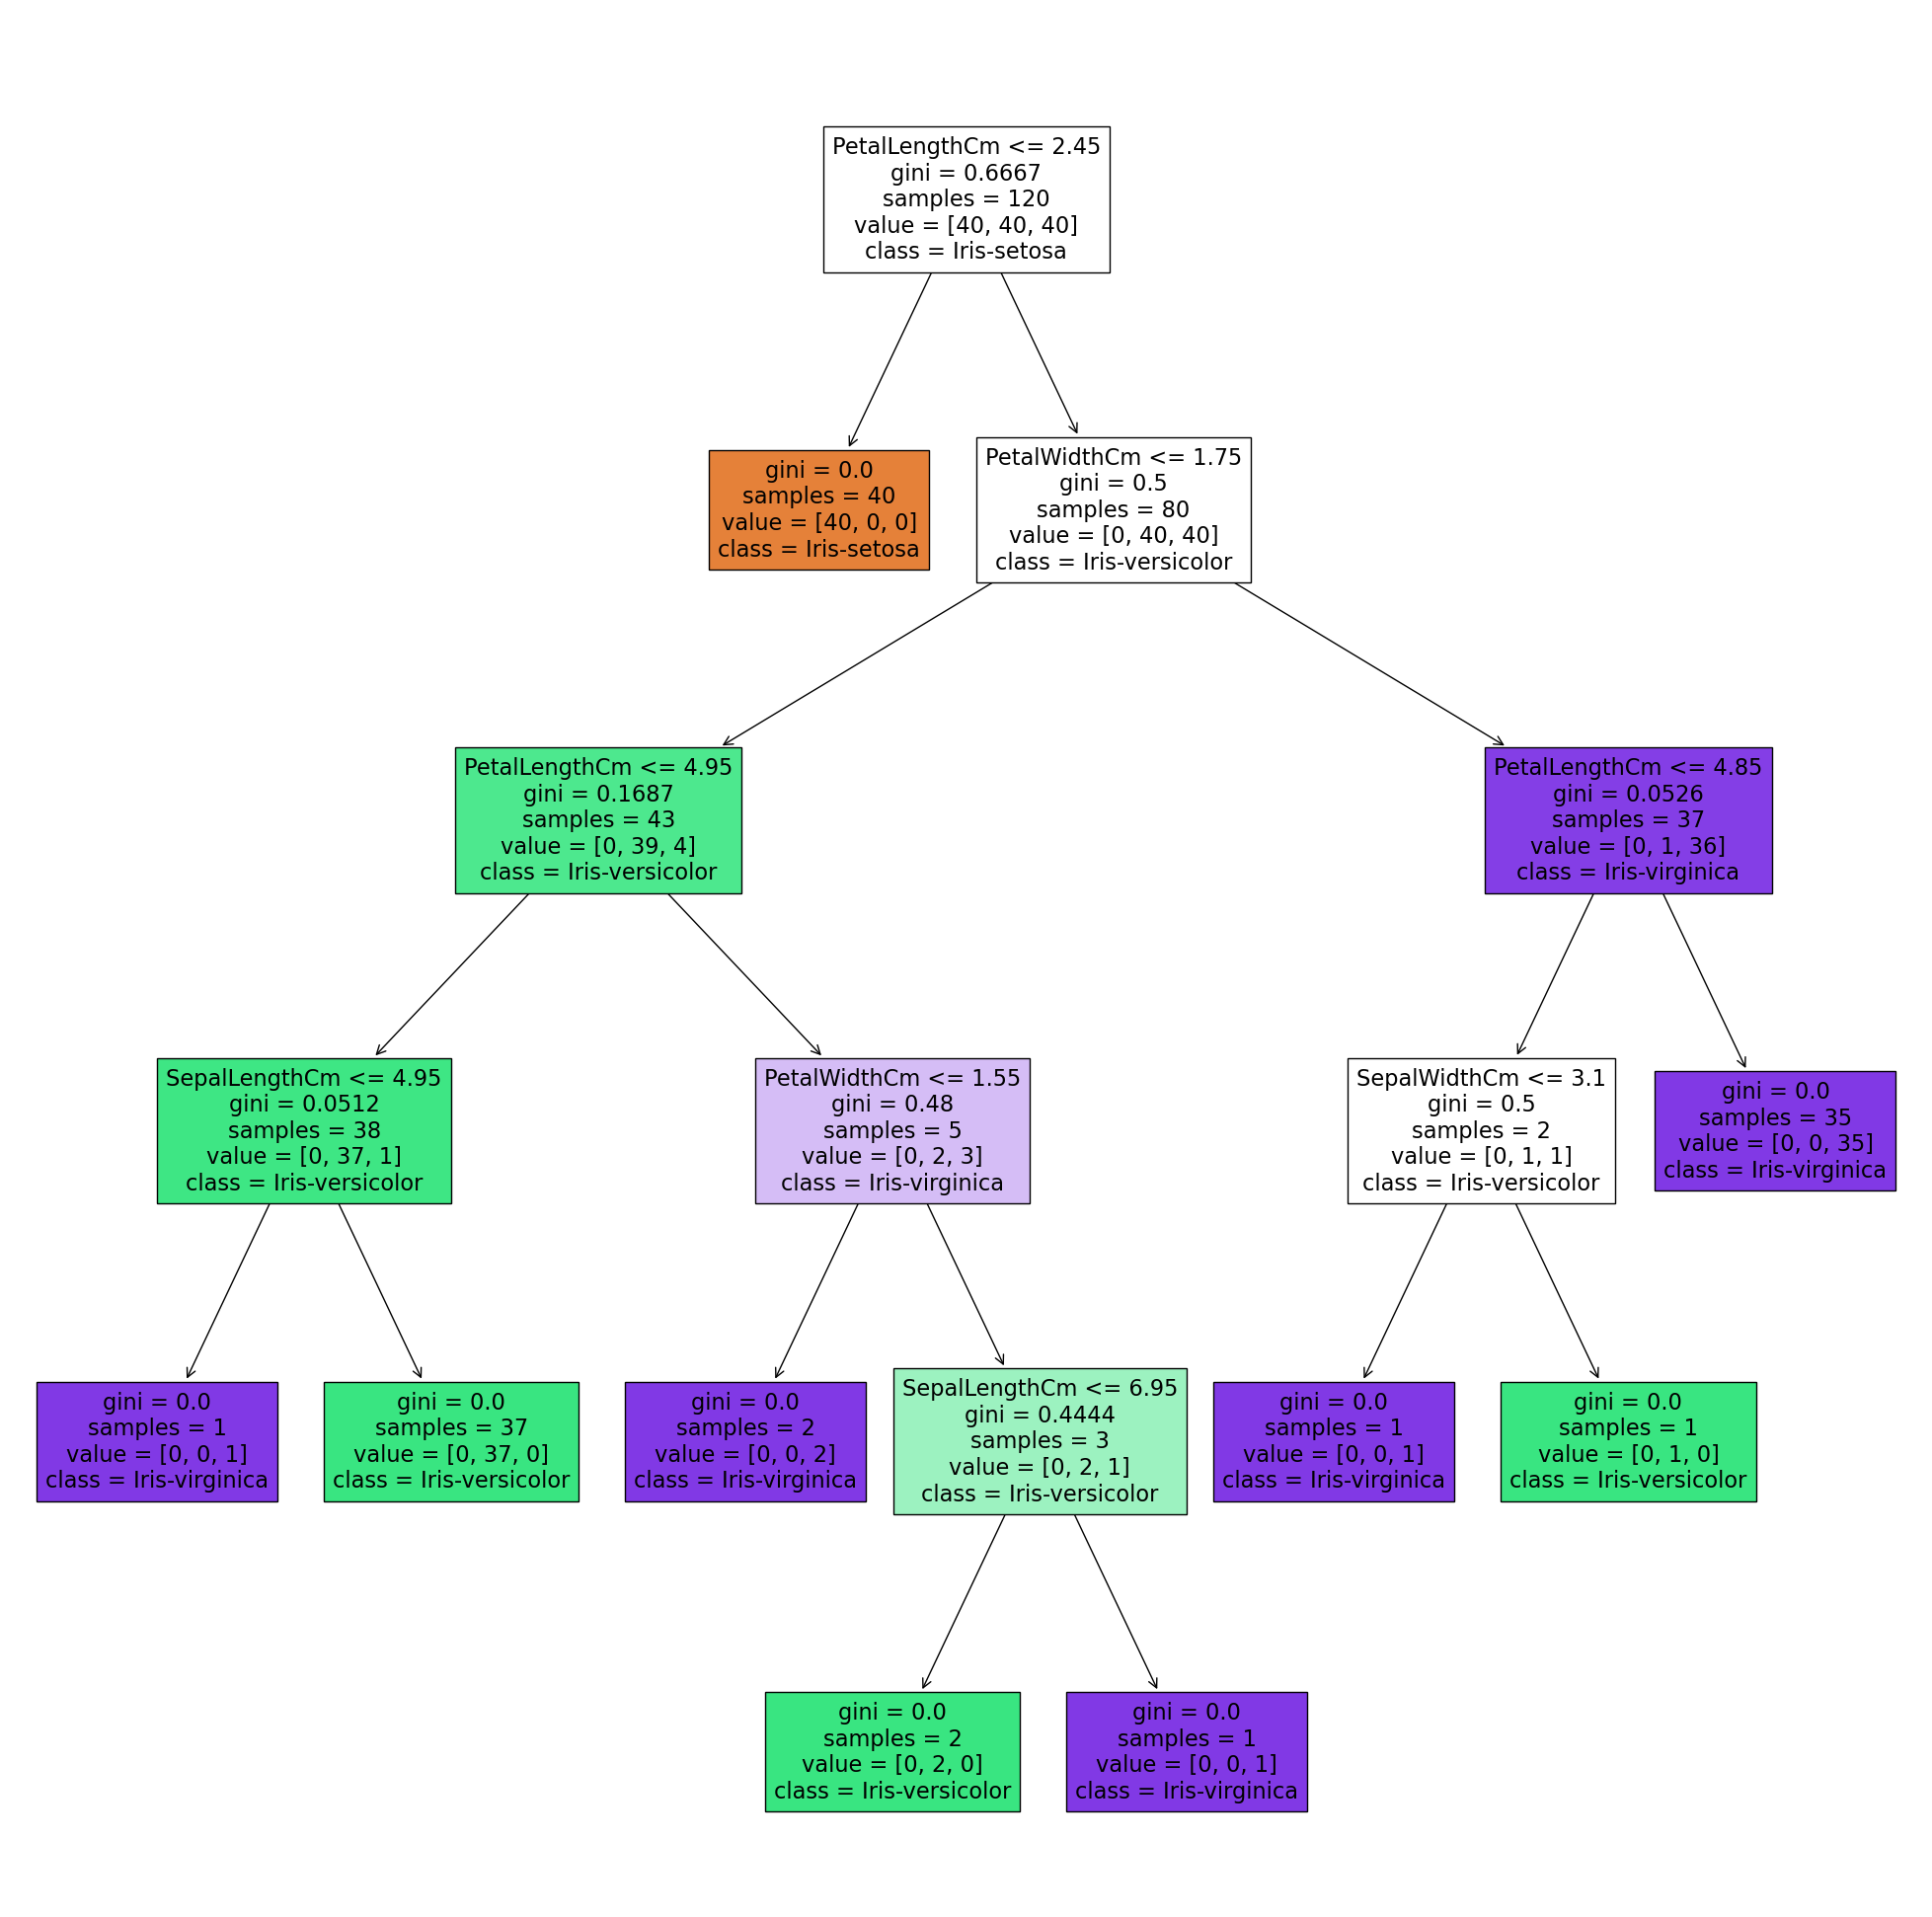

In [120]:
plt.figure(figsize = (25,25),dpi = 100)
tree_plot= plot_tree(Decision_Tree_Classifier,feature_names = iris.columns,class_names = iris['Species'].unique().tolist(),precision = 4,label='all',filled = True)
plt.title('Decision_Tree_Plot',color='white',size = 25)
plt.show()

In [114]:
X_train, X_test, Y_train, Y_test  = train_test_split(iris_data, iris_species, test_size = 0.2, random_state = 3)
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train,Y_train)

new_data = [[6.3, 3.4, 5.6, 2.4],[2.3, 1.4, 3.6, 0.4]]
Decision_Tree_Classifier.predict(new_data)

array(['Iris-virginica', 'Iris-setosa'], dtype=object)

Accuracy of the modal is 96.33

Train 80% of data and test 20% of data

At check the modal for take a random value of petal and sepal.